## Data Preprocessing

In [31]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


## Plot some of the data

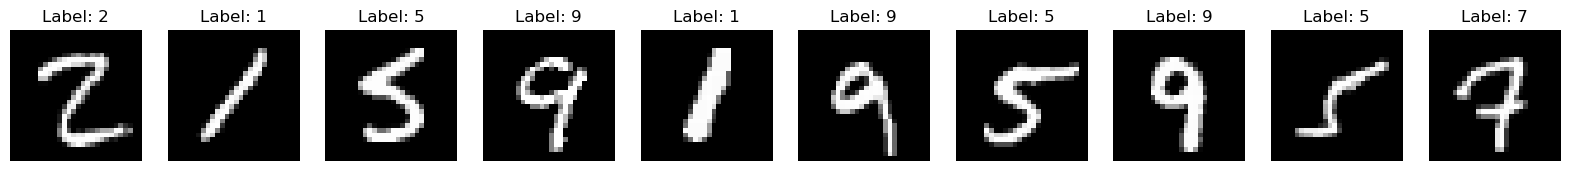

In [32]:
import random
import matplotlib.pyplot as plt

sample = random.sample(range(len(x_train)), 10)

plt.figure(figsize=(20, 5))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.title('Label: ' + str(y_train[sample[i]].argmax()))
    plt.imshow(x_train[sample[i]], cmap='gray')
    plt.axis('off')

## Build and fit the model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1321 - accuracy: 0.9610
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0410 - accuracy: 0.9874
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0211 - accuracy: 0.9930
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0133 - accuracy: 0.9958
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0086 - accuracy: 0.9974
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0068 - accuracy: 0.9975
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0051 - accuracy: 0.9984
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0049 - accuracy: 0.9983
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0038 - accuracy: 0.9986
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 

## Run model on test data

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

print('Accuracy:', accuracy_score(y_test_labels, y_pred))

print('Classification Report:')
print(classification_report(y_test_labels, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test_labels, y_pred))



313/313 [==============================] - 0s 1ms/step
Accuracy: 0.9858
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:
[[ 971    1    1    0    0    0    4    1    2    0]
 [   1 1128    1    0    0    1    2    1    1    0]
 [   2    4 1018    0 

## Saves the model

In [36]:
model.save('model.h5')